In [36]:
import numpy as np
import pandas as pd

In [37]:
bgvar_20 = pd.read_stata('avars_202001_EN_1.0p.dta')
hea_20 = pd.read_stata('ch20m_EN_1.0p.dta')
rel_20 = pd.read_stata('cr20m_EN_1.1p.dta')
soc_20 = pd.read_stata('cs20m_EN_1.1p.dta')
fam_20 = pd.read_stata('cf20m_EN_1.0p.dta')
wor_20 = pd.read_stata('cw20m_EN_1.0p.dta')
per_20 = pd.read_stata('cp20l_EN_1.0p.dta')
val_20 = pd.read_stata('cv20l_EN_1.0p.dta')
ass_20 = pd.read_stata('ca20g_EN_1.0p.dta')
inc_20 = pd.read_stata('ci20m_EN_1.0p.dta')
hou_20 = pd.read_stata('cd20m_EN_2.0p.dta')

In [38]:
#column combinators (replaces given columns with one containing their avg values)
def average_columns(df, *columns):
    new_column_name = columns[-1]
    
    try:
        selected_columns = list(columns[:-1])
        avg_col = df[selected_columns].astype(float).mean(axis=1)
        return pd.DataFrame({new_column_name: avg_col})
    except KeyError as e:
        print(f'KeyError: {e} not found in DataFrame columns.')
        return pd.DataFrame({new_column_name: np.nan})

#replaces given columns with one containing their sums (not working ;-())
def sum_columns(df, new_column, *columns):
    df[new_column] = df[columns].sum(axis=1)

Background variables:

1. geslacht to sex
2. leeftijd to age
3. lftdcat to age_cat
4. aantalhh to hhm_num
5. aantalki to hh_chi
6. burgstat to civ_sta
7. woning to dwe_typ
8. sted to urb_lvl (Urban character: Surrounding address density per km2 extremely urban 2,500 or more very 1,500 to 2,500 moderately 1,000 to 1,500 slightly 500 to 1,000 not less than 500) 
9. belbezig to pri_occ 
10. brutoink to mon_inc 
11. brutocat mon_inc_cat 12. brutohh_f to hh_inc 
13. oplzon to edu_lvl

In [39]:
bgvar_20[bgvar_20.select_dtypes(include='category').columns] = bgvar_20[bgvar_20.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
bg_var_names = {'nomem_encr':'nomem_encr', 'geslacht':'sex','leeftijd':'age', 'lftdcat':'age_cat', 'aantalhh':'hhm_num', 'aantalki':'hh_chi', 'burgstat':'civ_sta', 'woning':'dwe_typ', 'sted':'urb_lvl',  'belbezig':'pri_occ', 'brutoink':'mon_inc', 'brutocat':'mon_inc_cat','brutohh_f':'hh_inc', 'oplzon':'edu_lvl'}
bg_var = bgvar_20.loc[:, list(bg_var_names.keys())].rename(columns=bg_var_names)
bg_var.head()
print(bg_var.columns)

Index(['nomem_encr', 'sex', 'age', 'age_cat', 'hhm_num', 'hh_chi', 'civ_sta',
       'dwe_typ', 'urb_lvl', 'pri_occ', 'mon_inc', 'mon_inc_cat', 'hh_inc',
       'edu_lvl'],
      dtype='object')


Concepts in Health:
1. **Subjective health** (ch20m004 to sub_hea)
2. **Relative health** (ch20m005 to rel_hea)
3. Life expectancy
4. **Mental health** (all neg as men_hea_neg and and all pos as men_hea_pos)
5. Height, weight
6. **Chronical problems** (ch20m018 to disability)
7. Health problems
8. Impediment in labour
9. **Substance use** (ch20m126 to smoker, ch20m133 to alcohol, all substances to subs)
10. Medication
11. Physical activity - only until 2018
12. Health improving behaviour - - only until 2018
13. Use of healthcare
14. Sight and hearing
15. Health insurance

In [40]:
#select categorical columns and convert to numeric
hea_20[hea_20.select_dtypes(include='category').columns] = hea_20[hea_20.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#average for mental health and drugs
hea_toavg = [('ch20m011','ch20m014','ch20m012', 'men_hea_neg'),('ch20m013', 'ch20m015', 'men_hea_pos'), ('ch20m159', 'ch20m160', 'ch20m161', 'ch20m161', 'ch20m162', 'ch20m163', 'ch20m270', 'subs')]
hea_20 = pd.concat([hea_20] + [average_columns(hea_20, *column_set) for column_set in hea_toavg], axis=1)

#create a new df hea_20_con with selected columnns and new columns containing avgs (representing concepts)
hea_con = {'nomem_encr':'nomem_encr', 'ch20m004': 'sub_hea', 'ch20m005': 'rel_hea', 'ch20m018': 'disability', 'ch20m020':'mob_issues', 'ch20m126':'smoker', 'ch20m133':'alcohol', 'men_hea_neg':'men_hea_neg', 'men_hea_pos':'men_hea_pos', 'subs':'subs'}
hea_20_con = hea_20.loc[:, list(hea_con.keys())].rename(columns=hea_con)

#ready
hea_20_con.head()

,nomem_encr,sub_hea,rel_hea,disability,mob_issues,smoker,alcohol,men_hea_neg,men_hea_pos,subs
0,800009.0,2,2,0,0,1,0,0.000000,3.5,0.000000
1,800015.0,2,2,0,0,-1,2,0.000000,3.5,0.000000
2,800057.0,3,1,1,0,1,1,0.666667,3.5,0.000000
3,800058.0,2,3,1,3,-1,3,2.333333,3.0,0.142857
4,800100.0,4,4,1,0,-1,7,0.000000,5.0,0.000000


Concepts in Religion and Ethnicity:

1. **Religious upbringing** (cr20m135 to rel_upb)
2. **Religious affiliation** (cr20m144 to rel_aff)
3. **Religiosity** (cr20m162 to relig)
4. Religious orthodoxy
5. Nationality 
6. **Origin** (cr20m079 – cr20m087 to lang_ori, cr20m079 indicating Dutch or not)
7. **Ethnic identification** (cr20m164 to eth_id)
8. Language proficiency and use

In [41]:
rel_con = {'nomem_encr':'nomem_encr','cr20m135':'rel_upb', 'cr20m144':'rel_aff', 'cr20m162':'relig', 'cr20m079':'lang_ori', 'cr20m164':'eth_id'}
rel_20[rel_20.select_dtypes(include='category').columns] = rel_20[rel_20.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
rel_20_con = rel_20.loc[:, list(rel_con.keys())].rename(columns=rel_con)
rel_20_con.head()

,nomem_encr,rel_upb,rel_aff,relig,lang_ori,eth_id
0,800009.0,3,2,2,1,1
1,800015.0,1,-1,4,0,3
2,800057.0,2,-1,4,1,0
3,800058.0,-1,-1,3,1,1
4,800085.0,2,-1,3,0,1


Concepts in Social Intergation and Leisure:

1. Loneliness
2. Social contacts 
3. **Satisfaction leisure** (cs20m001 to lei_sat)
4. Social engagement
5. Volunteer aid
6. Time expenditure voluntary work
7. **Cultural participation** (sum cs20m494 - cs20m496 to cul_par)
8. **Holidays** (cs20m103 to ab_hol)
9. **Sport** (cs20m105 to spo_h)
10. Media usage

In [42]:
soc_20[soc_20.select_dtypes(include='category').columns] = soc_20[soc_20.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
cultosum = ['cs20m494', 'cs20m495', 'cs20m517', 'cs20m093', 'cs20m094', 'cs20m568', 'cs20m516', 'cs20m496']
soc_20['cul_sum'] = soc_20[cultosum].sum(axis=1)
soc_con = {'nomem_encr':'nomem_encr','cs20m001':'lei_sat', 'cul_sum':'cul_par', 'cs20m103':'ab_hol', 'cs20m105':'spo_h'}
soc_20_con = soc_20.loc[:, list(soc_con.keys())].rename(columns=soc_con)
print(soc_20_con)

      nomem_encr  lei_sat  cul_par  ab_hol  spo_h
0       800009.0        9        4       0    NaN
1       800015.0        9        0       1    NaN
2       800058.0        9        3       1    2.0
3       800100.0       11        0       0   10.0
4       800119.0        9        0       1    NaN
...          ...      ...      ...     ...    ...
5965    899794.0       11        8       0    2.0
5966    899908.0        5        0       0    8.0
5967    899923.0        8        2       2    6.0
5968    899928.0        8        5       0    3.0
5969    899946.0        6        3       0    NaN

[5970 rows x 5 columns]


/var/folders/bs/z96739d14kv16wpypz0ww9b40000gn/T/ipykernel_40868/4126897073.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  soc_20['cul_sum'] = soc_20[cultosum].sum(axis=1)


Concepts in Family and Household:

1. **Parental relations** (cf20m145+cf20m146 to par_int)
2. **Partnership** (cf20m025 to liv_tog)
3. Marriage
4. Marital history
5. **Children** (cf20m455 to chi_num, cf20m456 to chi1_bir)
6. **Partnership and childbirth intentions** (cf20m128 to chi_fut)
7. Infertility
8. Parental support
9. Parent support
10. Quality of relationship
11. Division of domestic tasks
12. Perceived burden domestic tasks
13. Perceived burden child care
14. Perceived fairness division tasks
15. Child education: Supervision
16. Childcare

In [43]:
fam_20[fam_20.select_dtypes(include='category').columns] = fam_20[fam_20.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
famtosum = ['cf20m143', 'cf20m144']
fam_20['fam_sum'] = fam_20[famtosum].sum(axis=1)
fam_con = {'nomem_encr':'nomem_encr', 'fam_sum':'par_int', 'cf20m025':'liv_tog', 'cf20m455':'chi_num', 'cf20m456':'chi1_bir', 'cf20m128':'chi_fut'}
fam_20_con = fam_20.loc[:, list(fam_con.keys())].rename(columns=fam_con)
print(fam_20_con)

      nomem_encr  par_int  liv_tog  chi_num  chi1_bir  chi_fut
0       800009.0       -2        0      3.0    1982.0       -1
1       800015.0       -2        0      2.0    1994.0       -1
2       800057.0        4        0      3.0    2007.0        1
3       800058.0        2       -1      NaN       NaN        0
4       800085.0       -2       -1      NaN       NaN        0
...          ...      ...      ...      ...       ...      ...
6071    899794.0       -2        0      2.0    1993.0       -1
6072    899908.0        4       -1      NaN       NaN        0
6073    899923.0        4        0      2.0    1993.0       -1
6074    899928.0       -2       -1      1.0    1970.0       -1
6075    899946.0        4       -1      NaN       NaN        1

[6076 rows x 6 columns]


/var/folders/bs/z96739d14kv16wpypz0ww9b40000gn/T/ipykernel_40868/4237264192.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fam_20['fam_sum'] = fam_20[famtosum].sum(axis=1)


Concepts in Work and Schooling:

1. Employment / activity status
2. Hours of paid work
3. **Characteristics current or last job** (cw20m136 to wor_min, cw20m140 to wor_nig, cw20m142 to wor_hom, cw20m402 to wor_sect)
4. Average pay job
5. Second jobs
6. Work aspirations
7. **Satisfaction** (cw20m128 to inc_sat)
8. Employment conditions
9. Commuting
10. Pensions
11. Non-working, non-pension
12. Job search
13. Satisfaction education
14. Highest qualification
15. Highest education
16. Qualifications for job
17. Education and training in last year

cw22o439 to chi_<8

In [44]:
wor_20[wor_20.select_dtypes(include='category').columns] = wor_20[wor_20.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)
wor_con = {'nomem_encr':'nomem_encr', 'cw20m136':'wor_min', 'cw20m140':'wor_nig', 'cw20m142':'wor_hom', 'cw20m402':'wor_sect', 'cw20m128':'inc_sat', 'cw20m439':'chi_<8'}
wor_20_con = wor_20.loc[:, list(wor_con.keys())].rename(columns=wor_con)
print(wor_20_con)

      nomem_encr  wor_min  wor_nig  wor_hom  wor_sect  inc_sat  chi_<8
0       800009.0      NaN       -1       -1        -1       -1      -1
1       800015.0      5.0        1        0        10        7       1
2       800057.0     15.0        1        0        -1        7      -1
3       800058.0      5.0        0        0         6        5      -1
4       800100.0      5.0       -1        0        12        7       0
...          ...      ...      ...      ...       ...      ...     ...
5641    899928.0      NaN       -1       -1        -1       -1      -1
5642    899934.0      NaN       -1       -1        14       -1      -1
5643    899946.0      NaN       -1       -1        14       -1      -1
5644    899954.0      NaN       -1       -1        -1       -1      -1
5645    899960.0     55.0        0        0         9        6      -1

[5646 rows x 7 columns]


Concepts in Personality:
1. Happiness
2. **Life satisfaction** (cp20m014-016 to life_satf, cp20m070-079 as self_est_pos or self_est_neg)
3. Big five personality
4. Survey attitude
5. Self esteem
6. Mood
7. Need to evaluate
8. **Value orientation** (cp20m100 to res, cp20m110 to ind, cp20m118 to fam_sec, cp20m119 to free, cp20m129 to comf_life, cp20m133 to soc_rec)
9. Inclusion of Others in the Self
10. Social desirability
11. Affects
12. Need for Cognition
13. **Social trust** (cp20m019 to trust )

In [45]:
per_20[per_20.select_dtypes(include='category').columns] = per_20[per_20.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#averages for life satisfaction and self-esteem
per_toavg = [('cp20l014','cp20l015','cp20l016', 'cp20l017', 'cp20l018','life_satf'),('cp20l070', 'cp20l071', 'cp20l073', 'cp20l075', 'cp20l076', 'self_est_pos'), ('cp20l072', 'cp20l074', 'cp20l078', 'cp20l079', 'self_est_neg')]
per_20 = pd.concat([per_20] + [average_columns(per_20, *column_set) for column_set in per_toavg], axis=1)

#create a new df per_20_con with selected columnns and new columns containing avgs (representing concepts)
per_con = {'nomem_encr':'nomem_encr','cp20l100': 'resp', 'cp20l110': 'ind','cp20l118': 'fam_sec','cp20l119': 'free', 'cp20l133': 'soc_rec', 'cp20l129': 'comf_life', 'cp20l019': 'trust', 'life_satf':'life_satf', 'self_est_pos':'self_est_pos', 'self_est_neg':'self_est_neg' }
per_20_con = per_20.loc[:, list(per_con.keys())].rename(columns=per_con)

#ready
per_20_con.head()

,nomem_encr,resp,ind,fam_sec,free,soc_rec,comf_life,trust,life_satf,self_est_pos,self_est_neg
0,800009.0,-1,-1,-1,-1,-1,-1,7,3.2,-1.0,-1.00
1,800015.0,6,6,6,6,0,5,6,4.2,5.2,0.00
2,800057.0,5,6,6,6,4,5,8,5.4,5.4,0.00
3,800058.0,5,3,6,6,3,5,9,4.8,4.4,2.25
4,800085.0,6,4,-1,-1,-1,-1,7,3.6,6.0,0.00


Concepts in Values:
1. Beliefs about maternal employment
2. **Gender role attitudes** (cv20l113 to gend_roles)
3. Political position ethnic minorities *page not working*
4. Right wing attitudes *page not working*
5. **Attitude towards foreigners** (cv20l120 to nationalist)
6. Marriage attitudes
7. Family solidarity
8. Norm of having children
9. Work ethic
10. Conservatism
11. Economic conservatism

In [46]:
val_20[val_20.select_dtypes(include='category').columns] = val_20[val_20.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#create a new df val_20_con with selected columnns and new columns containing avgs (representing concepts)
val_con = {'nomem_encr':'nomem_encr','cv20l113': 'gend_roles', 'cv20l120': 'nationalist'}
val_20_con = val_20.loc[:, list(val_con.keys())].rename(columns=val_con)

#ready
val_20_con.head()

,nomem_encr,gend_roles,nationalist
0,800009.0,0,2
1,800015.0,0,0
2,800054.0,-1,-1
3,800057.0,0,3
4,800085.0,-1,-1


Concepts in Economic Situtation: Assets:
1. **Assets** (ca20g008 to ass_own, ca20g023 to ass_val, ca20g012 to tot_bal)

In [47]:
#mapping dictionary for asset value
mean_mapping = {
    -1: None,
    0: None,
    1: 250,
    2: 1000,
    3: 2000,
    4: 3750,
    5: 6250,
    6: 8750,
    7: 11000,
    8: 13500,
    9: 17500,
    10: 22500,
    11: 37500,
    12: 62500,
    13: 87500,
    14: 100000,
}

ass_20['ca20g023'] = ass_20['ca20g023'].replace(-9, np.nan).combine_first(ass_20['ca20g024'].map(mean_mapping))
ass_20['ca20g023'] = ass_20['ca20g023'].replace(-8, np.nan).combine_first(ass_20['ca20g024'].map(mean_mapping))

In [48]:
#mapping dictionary for total balance
mean_mapping = {
    -1: None,
    0: None,
    1: 25,
    2: 150,
    3: 375,
    4: 625,
    5: 875,
    6: 1750,
    7: 3725,
    8: 6250,
    9: 8750,
    10: 10750,
    11: 12750,
    12: 15500,
    13: 18500,
    14: 22500,
    15: 25000,
}

#for don't know
ass_20['ca20g012'] = ass_20['ca20g012'].replace(-9999999999, np.nan).combine_first(ass_20['ca20g023'].map(mean_mapping))
ass_20['ca20g012'] = ass_20['ca20g012'].replace(999999999, np.nan).combine_first(ass_20['ca20g023'].map(mean_mapping))
#for prefer not to say
ass_20['ca20g012'] = ass_20['ca20g012'].replace(-9999999998, np.nan).combine_first(ass_20['ca20g023'].map(mean_mapping))

In [49]:
ass_20['ca20g023'] = pd.to_numeric(ass_20['ca20g023'], errors='coerce')
ass_20['ca20g012'] = pd.to_numeric(ass_20['ca20g012'], errors='coerce')

ass_20[ass_20.select_dtypes(include='category').columns] = ass_20[ass_20.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#if car assets owned = 0 then car assets value = 0
ass_20.loc[ass_20['ca20g008'] == 0, 'ca20g023'] = 0

#if assets/money saved = 0 then tot_bal = 0
ass_20.loc[ass_20['ca20g078'] == 0, 'ca20g012'] = 0

In [50]:
ass_con = {'nomem_encr':'nomem_encr', 'ca20g008':'ass_own','ca20g023':'ass_val', 'ca20g012':'tot_bal'}
ass_20_con = ass_20.loc[:, list(ass_con.keys())].rename(columns=ass_con)
display(ass_20_con)

,nomem_encr,ass_own,ass_val,tot_bal
0,800009.0,1,1500.0,6900.0
1,800015.0,0,0.0,10000.0
2,800057.0,1,NaN,NaN
3,800058.0,0,0.0,2000.0
4,800100.0,1,NaN,NaN
...,...,...,...,...
5844,899794.0,0,0.0,30000.0
5845,899908.0,0,0.0,50.0
5846,899923.0,1,NaN,NaN
5847,899928.0,0,0.0,15000.0


Concepts in Income: 
1. Subjective standard of living
2. Satisfaction income
3. Employment income / Earnings cj008
4. Self-employment income
5. Non-employment income: pension
6. Non-employment income: benefits
7. Non-employment income: other
8. Credit, debt, payments
9. **Total income** (ci20m226 to income)
10. **Financial/material well-being** (ci20m252 to fin_sit)
11. Financial expectations
12. Financial management
13. Material deprivation


In [51]:
inc_20[inc_20.select_dtypes(include='category').columns] = inc_20[inc_20.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

#create a new df per_22_con with selected columnns and new columns containing avgs (representing concepts)
inc_con = {'nomem_encr':'nomem_encr','ci20m226': 'income', 'ci20m252': 'fin_sit' }
inc_20_con = inc_20.loc[:, list(inc_con.keys())].rename(columns=inc_con)

#ready
inc_20_con.head()

,nomem_encr,income,fin_sit
0,800015.0,-1,4
1,800058.0,0,0
2,800100.0,-1,4
3,800119.0,0,3
4,800127.0,8,1


Concepts for Housing:
1. Satisfaction housing
2. Housing characteristics
3. Housing expenditure 
4. **Housing wealth** (cd20m025 to pur_price)

In [52]:
#calculate rent amount
rent_freq = {
    'month': 1,
    'quarter': 3,
    'half year': 6,
    'year': 12,
    'week': 4,
    'two weeks': 2,
    'four weeks': 1,
    "I don't know": None,
    'I prefer not to say': None
}

hou_20['cd20m008'] = pd.to_numeric(hou_20['cd20m008'], errors='coerce')
hou_20['cd20m093'] = hou_20['cd20m093'].astype('category')
hou_20['cd20m093_numeric'] = hou_20['cd20m093'].map(rent_freq)

hou_20['rent'] = hou_20['cd20m008'] / hou_20['cd20m093_numeric']

In [53]:
hou_20[hou_20.select_dtypes(include='category').columns] = hou_20[hou_20.select_dtypes(include='category').columns].apply(lambda col: col.astype('category').cat.codes)

hou_con = {'nomem_encr':'nomem_encr', 'cd20m003': 'hou_type','rent': 'rent', 'cd20m025': 'pur_price'}
hou_20_con = hou_20.loc[:, list(hou_con.keys())].rename(columns=hou_con)
display(hou_20_con)

,nomem_encr,hou_type,rent,pur_price
0,800015.0,2,NaN,94463.0
1,800058.0,0,425.0,NaN
2,800127.0,2,NaN,140000.0
3,800161.0,2,NaN,340000.0
4,800170.0,2,NaN,75000.0
...,...,...,...,...
4172,899794.0,0,750.0,NaN
4173,899923.0,2,NaN,118500.0
4174,899928.0,2,NaN,590.0
4175,899946.0,2,NaN,143000.0


In [54]:
#merge
all_20 = [bg_var, fam_20_con, hea_20_con, soc_20_con, val_20_con, wor_20_con, per_20_con, inc_20_con, ass_20_con, hou_20_con]

merged_20 = all_20[0]

for all in all_20[1:]:
    merged_20 = pd.merge(merged_20, all, on='nomem_encr', how='inner')

In [55]:
merged_20.head()

,nomem_encr,sex,age,age_cat,hhm_num,hh_chi,civ_sta,dwe_typ,urb_lvl,pri_occ,...,self_est_pos,self_est_neg,income,fin_sit,ass_own,ass_val,tot_bal,hou_type,rent,pur_price
0,800015.0,0,57.0,5,3,2,0,0,0,0,...,5.2,0.00,-1,4,0,0.0,10000.0,2,NaN,94463.0
1,800170.0,1,61.0,5,2,2,2,0,1,0,...,4.6,0.00,10,4,0,0.0,12000.0,2,NaN,75000.0
2,800186.0,1,80.0,6,1,0,3,0,2,7,...,4.4,0.75,7,4,0,0.0,NaN,2,NaN,29000.0
3,800201.0,0,46.0,4,1,0,0,1,3,0,...,4.0,3.50,-1,4,1,5000.0,45000.0,0,900.0,NaN
4,800204.0,0,78.0,6,1,0,0,0,1,8,...,5.4,0.50,7,1,1,15000.0,4000.0,2,NaN,108000.0


In [56]:
column_titles=merged_20.columns

In [57]:
from sklearn.impute import SimpleImputer

#replace empty values with NaN
merged_20.replace(' ', pd.NA, inplace=True)

#set nan to 0 for specific columns
to_0 = ['pur_price', 'chi1_bir', 'ass_val', 'rent']
merged_20[to_0] = merged_20[to_0].fillna(0)

#use SimpleImputer for numeric variables - tot_bal shouldnt probably be here (not accurate with mean)
numeric_vars = ['spo_h', 'wor_min', 'chi_num', 'tot_bal', 'hh_inc', 'urb_lvl']
numeric_imputer = SimpleImputer(strategy='mean')
merged_20[numeric_vars] = numeric_imputer.fit_transform(merged_20[numeric_vars])

#drop na in urb_lvl
merged_20.dropna(subset=['urb_lvl'], inplace=True)

In [58]:
#print(merged_20.columns)
# for idx, col in enumerate(merged_20.columns):
    # print(f"Column Index {idx}: '{col}'")

In [59]:
merged_20.head(20)

,nomem_encr,sex,age,age_cat,hhm_num,hh_chi,civ_sta,dwe_typ,urb_lvl,pri_occ,...,self_est_pos,self_est_neg,income,fin_sit,ass_own,ass_val,tot_bal,hou_type,rent,pur_price
0,800015.0,0,57.0,5,3,2,0,0,0.0,0,...,5.2,0.00,-1,4,0,0.0,10000.000000,2,0.0,94463.0
1,800170.0,1,61.0,5,2,2,2,0,1.0,0,...,4.6,0.00,10,4,0,0.0,12000.000000,2,0.0,75000.0
2,800186.0,1,80.0,6,1,0,3,0,2.0,7,...,4.4,0.75,7,4,0,0.0,34352.531469,2,0.0,29000.0
3,800201.0,0,46.0,4,1,0,0,1,3.0,0,...,4.0,3.50,-1,4,1,5000.0,45000.000000,0,900.0,0.0
4,800204.0,0,78.0,6,1,0,0,0,1.0,8,...,5.4,0.50,7,1,1,15000.0,4000.000000,2,0.0,108000.0
5,800228.0,0,67.0,6,1,0,0,0,1.0,8,...,4.4,1.25,-1,3,1,14000.0,75000.000000,2,0.0,420000.0
6,800289.0,1,66.0,6,1,0,0,0,3.0,8,...,4.8,0.00,8,3,1,5000.0,19500.000000,2,0.0,110000.0
7,800372.0,0,29.0,2,1,0,0,0,2.0,0,...,3.8,3.50,1,3,0,0.0,34352.531469,2,0.0,327500.0
8,800392.0,0,57.0,5,3,2,0,0,4.0,0,...,5.0,2.50,-1,2,0,0.0,0.000000,2,0.0,65900.0
9,800463.0,0,29.0,2,0,0,4,2,2.0,6,...,0.2,6.00,-1,2,0,0.0,252.000000,1,450.0,0.0


/Users/chaoticexhibit/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chaoticexhibit/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chaoticexhibit/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/chaoticexhibit/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chaoticexhibit/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chaoticexhibit/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chaoticexhibit/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

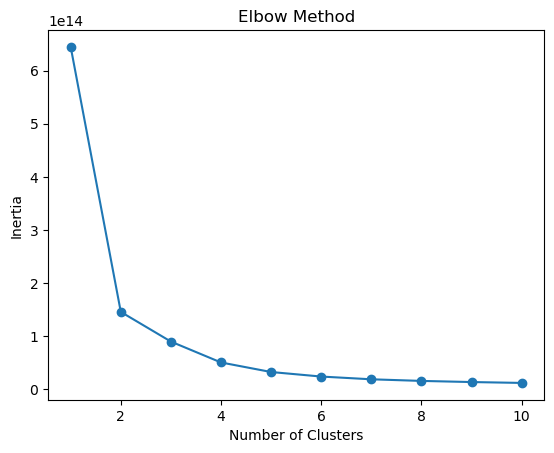

In [60]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
m20_df = merged_20
merged_20 = imputer.fit_transform(merged_20)


inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(merged_20)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


/Users/chaoticexhibit/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


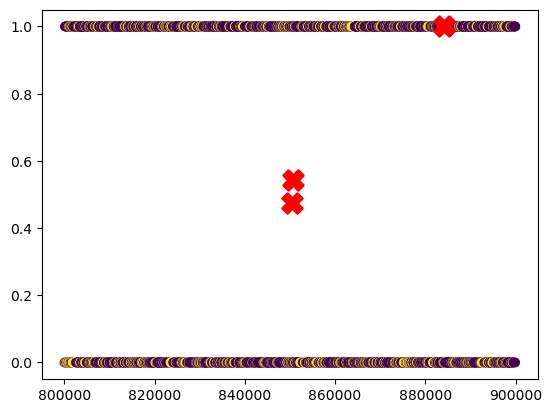

In [61]:
k = 3 
kmeans = KMeans(n_clusters=k)

kmeans.fit(merged_20)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(merged_20[:, 0], merged_20[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=2, color='red')
plt.show()


          0         1         2         3         4         5         6   \
0   1.000000 -0.017214  0.017568  0.011778 -0.042509 -0.049757  0.022782   
1  -0.017214  1.000000 -0.083878 -0.076514  0.031209  0.056012  0.067465   
2   0.017568 -0.083878  1.000000  0.960724 -0.247153 -0.305793 -0.256979   
3   0.011778 -0.076514  0.960724  1.000000 -0.227386 -0.286029 -0.286809   
4  -0.042509  0.031209 -0.247153 -0.227386  1.000000  0.900553 -0.419822   
5  -0.049757  0.056012 -0.305793 -0.286029  0.900553  1.000000 -0.208368   
6   0.022782  0.067465 -0.256979 -0.286809 -0.419822 -0.208368  1.000000   
7  -0.006341  0.052311 -0.057657 -0.078410 -0.270634 -0.164985  0.312182   
8  -0.032795 -0.011966  0.095260  0.096529  0.173493  0.122493 -0.218924   
9   0.030030  0.035751  0.589286  0.562579 -0.269421 -0.297342 -0.069112   
10 -0.025375 -0.329941 -0.125585 -0.118631  0.068090  0.060581  0.004320   
11  0.003886 -0.039503  0.156493  0.156085 -0.057268 -0.047829  0.014356   
12 -0.046798

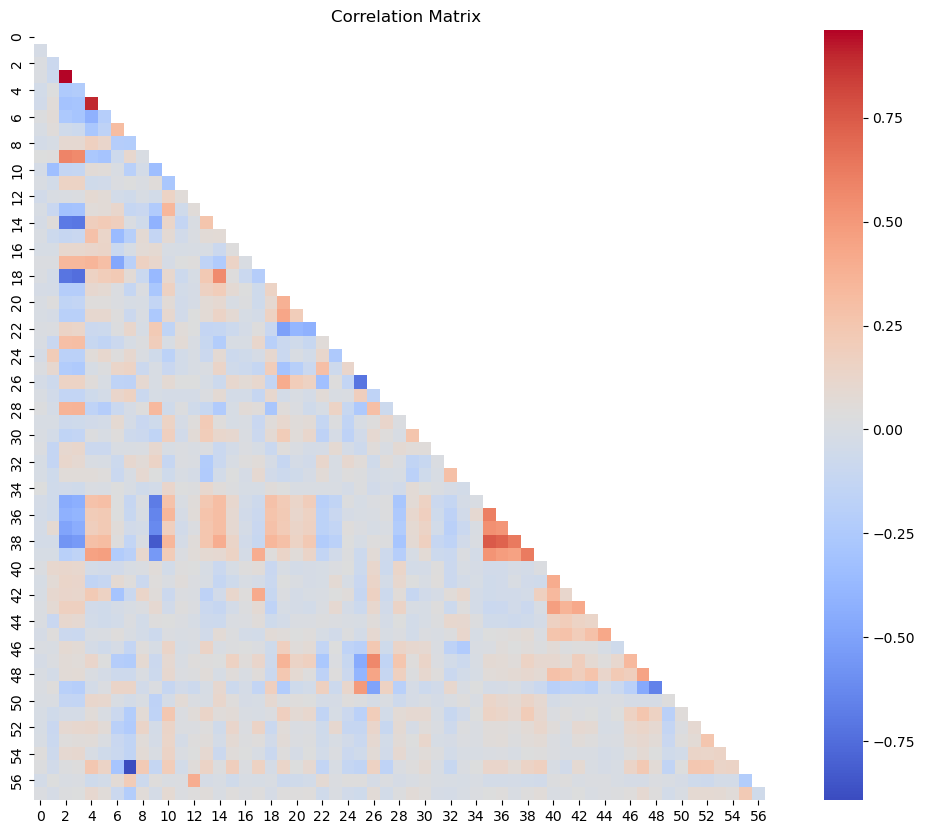

In [62]:
import pandas as pd

merged_20_df = pd.DataFrame(merged_20)
correlation_matrix = merged_20_df.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()




/Users/chaoticexhibit/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


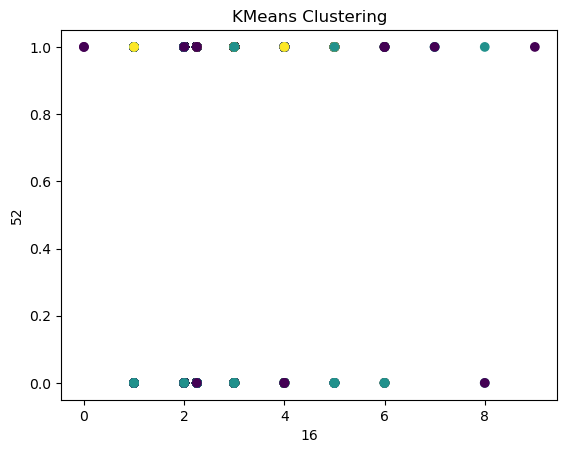

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
merged_20_imputed = pd.DataFrame(imputer.fit_transform(merged_20_df), columns=merged_20_df.columns)

#Means for clustering
n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(merged_20_imputed)


#visualise over first to columns to
plt.scatter(merged_20_imputed.iloc[:, 16], merged_20_imputed.iloc[:, 52], c=labels, cmap='viridis')
plt.xlabel(merged_20_imputed.columns[16])
plt.ylabel(merged_20_imputed.columns[52])
plt.title('KMeans Clustering')
plt.show()


/Users/chaoticexhibit/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


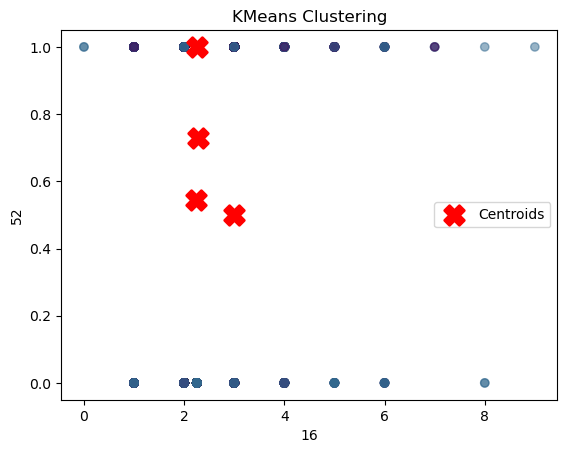

In [64]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
merged_20_imputed = pd.DataFrame(imputer.fit_transform(merged_20_df), columns=merged_20_df.columns)

# Means for clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(merged_20_imputed)

# Visualize over the first two columns
plt.scatter(merged_20_imputed.iloc[:, 16], merged_20_imputed.iloc[:, 52], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel(merged_20_imputed.columns[16])
plt.ylabel(merged_20_imputed.columns[52])
plt.title('KMeans Clustering')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 16], centroids[:, 52], marker='X', s=200, linewidths=2, color='red', label='Centroids')

plt.legend()
plt.show()


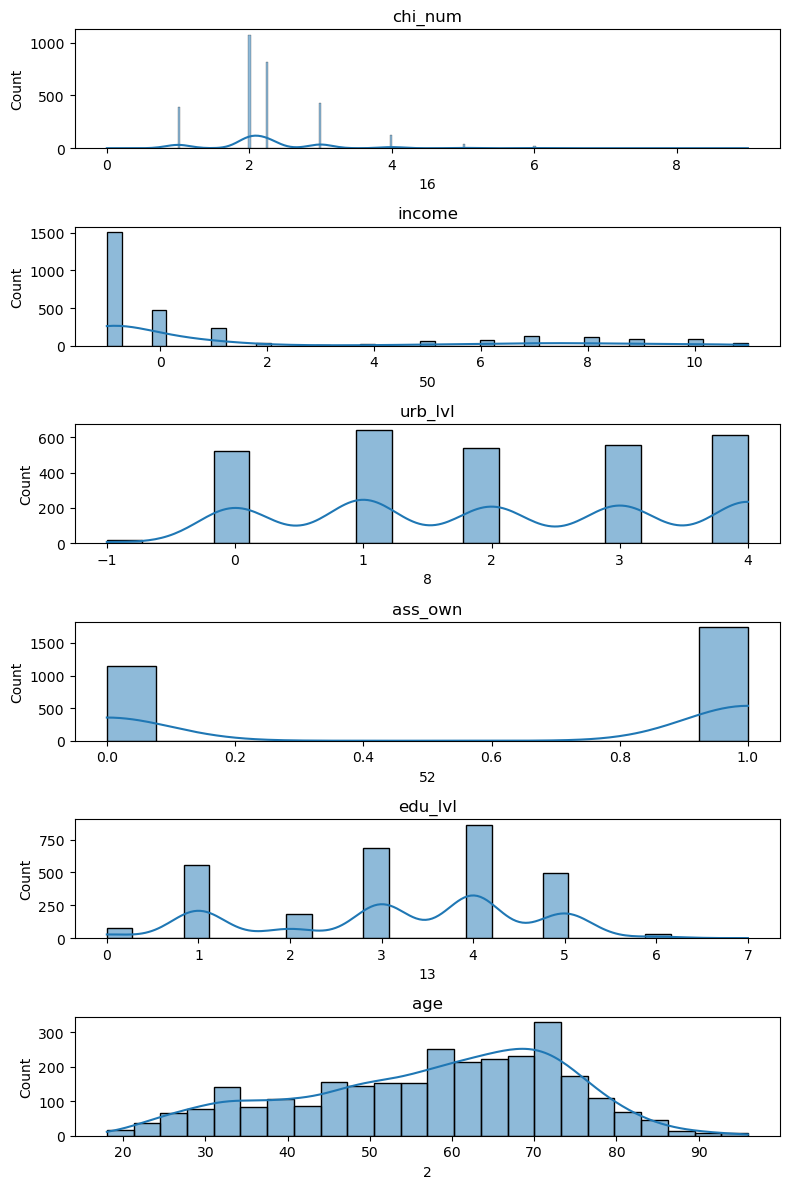

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = [16, 50, 8, 52, 13, 2]

column_names = {
    16: 'chi_num',
    50: 'income',
    8: 'urb_lvl',
    52: 'ass_own',
    13: 'edu_lvl',
    2: 'age'
}

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 2 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    sns.histplot(merged_20_df[column], ax=axes[i], kde=True)
    axes[i].set_title(column_names.get(column, f'Column {column}'))

plt.tight_layout()
plt.show()



Principal Component Analysis


In [66]:
m20_df.head()

,nomem_encr,sex,age,age_cat,hhm_num,hh_chi,civ_sta,dwe_typ,urb_lvl,pri_occ,...,self_est_pos,self_est_neg,income,fin_sit,ass_own,ass_val,tot_bal,hou_type,rent,pur_price
0,800015.0,0,57.0,5,3,2,0,0,0.0,0,...,5.2,0.00,-1,4,0,0.0,10000.000000,2,0.0,94463.0
1,800170.0,1,61.0,5,2,2,2,0,1.0,0,...,4.6,0.00,10,4,0,0.0,12000.000000,2,0.0,75000.0
2,800186.0,1,80.0,6,1,0,3,0,2.0,7,...,4.4,0.75,7,4,0,0.0,34352.531469,2,0.0,29000.0
3,800201.0,0,46.0,4,1,0,0,1,3.0,0,...,4.0,3.50,-1,4,1,5000.0,45000.000000,0,900.0,0.0
4,800204.0,0,78.0,6,1,0,0,0,1.0,8,...,5.4,0.50,7,1,1,15000.0,4000.000000,2,0.0,108000.0


In [67]:
merged_20_df.head()


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,800015.0,0.0,57.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,...,5.2,0.00,-1.0,4.0,0.0,0.0,10000.000000,2.0,0.0,94463.0
1,800170.0,1.0,61.0,5.0,2.0,2.0,2.0,0.0,1.0,0.0,...,4.6,0.00,10.0,4.0,0.0,0.0,12000.000000,2.0,0.0,75000.0
2,800186.0,1.0,80.0,6.0,1.0,0.0,3.0,0.0,2.0,7.0,...,4.4,0.75,7.0,4.0,0.0,0.0,34352.531469,2.0,0.0,29000.0
3,800201.0,0.0,46.0,4.0,1.0,0.0,0.0,1.0,3.0,0.0,...,4.0,3.50,-1.0,4.0,1.0,5000.0,45000.000000,0.0,900.0,0.0
4,800204.0,0.0,78.0,6.0,1.0,0.0,0.0,0.0,1.0,8.0,...,5.4,0.50,7.0,1.0,1.0,15000.0,4000.000000,2.0,0.0,108000.0


In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_20_df)

#apply PCA
n_components = min(merged_20_df.shape[0], merged_20_df.shape[1])
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)
loadings = pca.components_
component_index = 0
loadings_for_component = loadings[component_index]
loadings_df = pd.DataFrame({'Feature': column_titles, 'Loading': loadings_for_component})
loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)
print(loadings_df)


         Feature   Loading
38       inc_sat  0.319131
9        pri_occ -0.311278
2            age -0.296353
3        age_cat -0.287947
35       wor_nig  0.276601
36       wor_hom  0.264805
37      wor_sect  0.254026
14       par_int  0.230846
18       chi_fut  0.216245
39        chi_<8  0.203859
5         hh_chi  0.171244
4        hhm_num  0.161045
13       edu_lvl  0.157572
19       sub_hea  0.156013
10       mon_inc  0.145280
28       lei_sat -0.145097
21    disability  0.131465
22    mob_issues -0.129685
23        smoker -0.107151
30        ab_hol  0.097477
20       rel_hea  0.090685
55      hou_type  0.081014
51       fin_sit  0.079867
32    gend_roles -0.079704
15       liv_tog  0.075704
7        dwe_typ -0.070441
43          free -0.068018
50        income  0.064148
17      chi1_bir -0.055046
29       cul_par  0.054957
47     life_satf  0.051949
11   mon_inc_cat -0.048953
41           ind -0.048744
31         spo_h -0.047707
40          resp -0.045056
44       soc_rec -0.041139
3

display(merged_20_df)
merged_20_df=merged_20_df(columns=())

In [69]:
merged_20_df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,800015.0,0.0,57.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,...,5.2,0.00,-1.0,4.0,0.0,0.0,10000.000000,2.0,0.0,94463.0
1,800170.0,1.0,61.0,5.0,2.0,2.0,2.0,0.0,1.0,0.0,...,4.6,0.00,10.0,4.0,0.0,0.0,12000.000000,2.0,0.0,75000.0
2,800186.0,1.0,80.0,6.0,1.0,0.0,3.0,0.0,2.0,7.0,...,4.4,0.75,7.0,4.0,0.0,0.0,34352.531469,2.0,0.0,29000.0
3,800201.0,0.0,46.0,4.0,1.0,0.0,0.0,1.0,3.0,0.0,...,4.0,3.50,-1.0,4.0,1.0,5000.0,45000.000000,0.0,900.0,0.0
4,800204.0,0.0,78.0,6.0,1.0,0.0,0.0,0.0,1.0,8.0,...,5.4,0.50,7.0,1.0,1.0,15000.0,4000.000000,2.0,0.0,108000.0


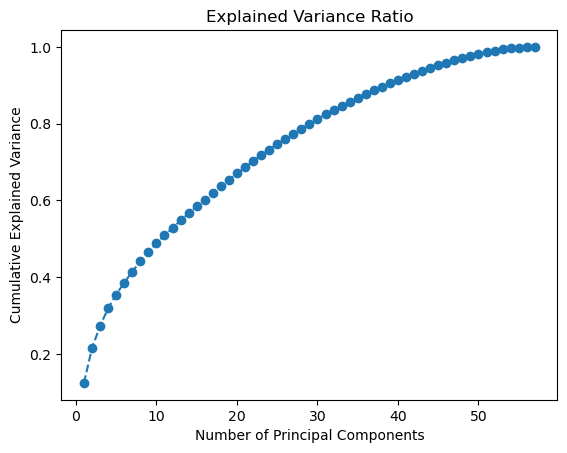

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.795235 -2.744527  0.950434 -0.207046  1.825490  1.348566  1.752336   
1  0.783871 -0.518821  2.141704 -1.511323  1.104275  0.588827  0.959531   
2 -1.967090 -0.152610  0.004958 -0.027244 -0.907557 -0.726761  2.091271   
3  2.640300  4.116812 -0.459508  1.939155  0.664806  1.118131 -0.572213   
4 -2.712829 -2.781601 -0.672194 -0.447829 -0.223835 -0.618350 -0.495673   

        PC8       PC9      PC10  ...      PC37      PC38      PC39      PC40  \
0  0.126824 -0.040283 -0.822643  ... -0.330552  0.791478 -0.984030  0.911541   
1 -1.025807  0.035709  1.125853  ...  1.155673 -0.325534  0.751526  0.518955   
2 -1.293295  0.035372  2.167391  ...  0.908586 -0.647924  0.031758  0.624598   
3 -0.134673  0.134267 -0.090416  ... -0.719959 -0.347276  0.657217 -1.153302   
4  0.782757 -1.501669 -0.511028  ... -0.326002 -0.242558 -0.066545  0.904918   

       PC41      PC42      PC43      PC44      PC45  ass_own  
0  0.

In [71]:
target_variable = ['ass_own']
X = m20_df.drop(target_variable, axis=1)  
y = m20_df[target_variable]  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Access explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = explained_var_ratio.cumsum()
n_components_to_retain = (cumulative_var_ratio < 0.95).sum() + 1

# Visualize explained variance ratio
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Fit PCA again with the determined number of components
pca_final = PCA(n_components=n_components_to_retain)
X_pca_final = pca_final.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, n_components_to_retain + 1)]
pc_df = pd.DataFrame(data=X_pca_final, columns=pc_columns)
result_df = pd.concat([pc_df, y.reset_index(drop=True)], axis=1)

# Print the final DataFrame with principal components and the target variable
print(result_df.head())

In [72]:
#PCA one
# Standardize the data
features = ['spo_h', 'wor_min', 'chi_num', 'tot_bal', 'hh_inc', 'ass_own']

x = m20_df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x)

#First principal component
loadings = pca.components_[0]

# Create a DataFrame to show the features and their loadings
loadings_df = pd.DataFrame({'Feature': features, 'Loading': loadings})
loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

#Print
print("Top contributing features to the first principal component:")
print(loadings_df)

Top contributing features to the first principal component:
   Feature   Loading
3  tot_bal  0.674667
5  ass_own  0.652240
2  chi_num  0.213955
4   hh_inc  0.194319
0    spo_h  0.181050
1  wor_min  0.055611


In [77]:
#PCA two
# Standardize the data
features = ['spo_h', 'wor_min', 'chi_num', 'tot_bal', 'hh_inc', 'ass_own']

x = m20_df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x)

#First principal component
loadings = pca.components_[1]

# Create a DataFrame to show the features and their loadings
loadings_df = pd.DataFrame({'Feature': features, 'Loading': loadings})
loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

# Print
print("Top contributing features to the second principal component:")
print(loadings_df)

Top contributing features to the second principal component:
   Feature   Loading
1  wor_min  0.685787
4   hh_inc  0.595547
2  chi_num -0.410405
3  tot_bal -0.071560
5  ass_own -0.032762
0    spo_h  0.019845


In [78]:
#PCA three
# Standardize the data
features = ['spo_h', 'wor_min', 'chi_num', 'tot_bal', 'hh_inc', 'ass_own']

x = m20_df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(x)

#First principal component
loadings = pca.components_[2]

# Create a DataFrame to show the features and their loadings
loadings_df = pd.DataFrame({'Feature': features, 'Loading': loadings})
loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

# Print
print("Top contributing features to the second principal component:")
print(loadings_df)

Top contributing features to the second principal component:
   Feature   Loading
0    spo_h  0.807053
2  chi_num  0.467117
5  ass_own -0.245736
1  wor_min  0.218815
3  tot_bal -0.148541
4   hh_inc  0.011670
